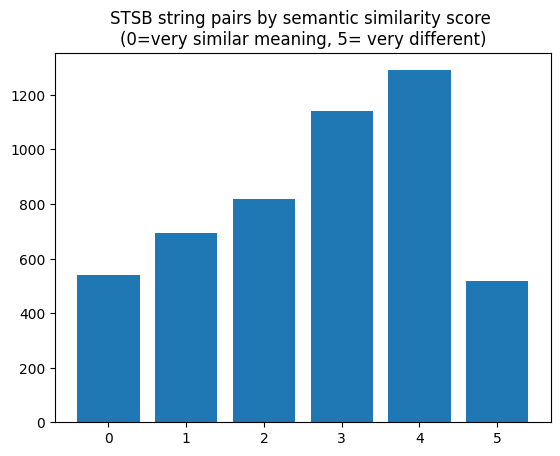

In [26]:
import matplotlib.pyplot as plt

from dataset import DS_STSB_REF_PATH, SIMILARITY_SCORE, DS_STSB_TEST_SIZE
from util import read_from_file, from_json

stsb_dict = from_json(read_from_file(DS_STSB_REF_PATH))
assert DS_STSB_TEST_SIZE == len(stsb_dict), str(DS_STSB_TEST_SIZE) + " <> " + str(len(stsb_dict))

sim_bucket = [0] * 6
for item  in stsb_dict.values():
    sim_bucket[round(item[SIMILARITY_SCORE])] += 1
assert  DS_STSB_TEST_SIZE == sum(sim_bucket), DS_STSB_TEST_SIZE + "<>" + sum(sim_bucket)

similarity_score = ["0", "1", "2", "3", "4", "5"]
counts = [sim_bucket[i] for i in range(6)]
_, ax = plt.subplots()
ax.bar(similarity_score, counts)
ax.set_title("STSB string pairs by semantic similarity score "
             "\n(0=very similar meaning, 5= very different)")
plt.show()

dict_keys(['cosine_similarity', 'distance', 'similarity_score'])
dict_keys(['amazon.titan-embed-text-v2:0', 'cohere.embed-english-v3', 'platform.mistral-embed'])
amazon.titan-embed-text-v2:0  - min dist: 0.0  - max: 1.4617826037500636
cohere.embed-english-v3  - min dist: 0.0  - max: 1.406618105806446
platform.mistral-embed  - min dist: 0.0  - max: 1.0065714965395895


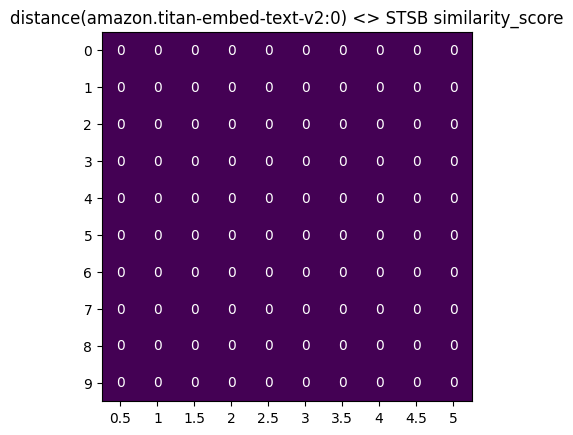

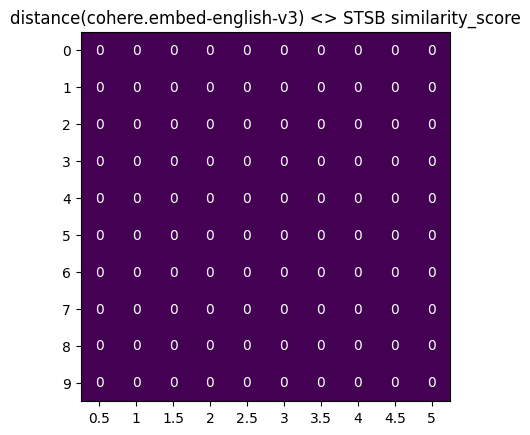

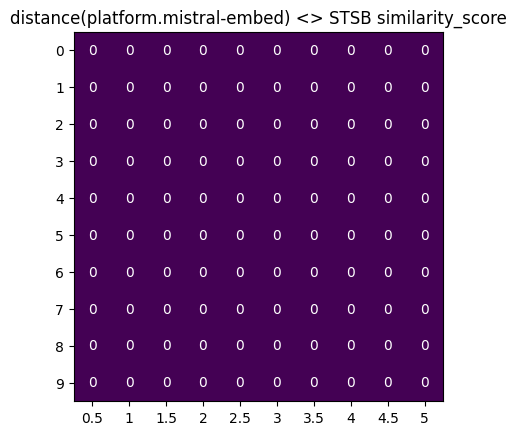

In [34]:
import matplotlib.pyplot as plt
import numpy as np
from metric import create_metrics
from dataset import DS_STSB_EMBED_PATH, DISTANCE

dataset = DS_STSB_EMBED_PATH
metrics = create_metrics(dataset)
print(metrics.keys())
assert 3 == len(metrics)
print(metrics[DISTANCE].keys())
x_labels = ["0.5", "1", "1.5", "2", "2.5", "3", "3.5", "4", "4.5", "5"]

for engine in metrics[DISTANCE]:
    min_dist = min(metrics[DISTANCE][engine]["sentence2-sentence1"])
    max_dist = max(metrics[DISTANCE][engine]["sentence2-sentence1"])
    y_labels = [0] * 10
    for i in range(10):
        y_labels[i] = i
    dist_interval = (max_dist - min_dist) / 10
    print(engine, " - min dist:", min_dist," - max:", max_dist)
    heat_map = np.array([[0] * 10] * 10)
    
    fig, ax = plt.subplots()
    ax.set_title( DISTANCE +"(" + engine + ")" + " <> " + "STSB " + SIMILARITY_SCORE)
    ax.set_xticks(np.arange(len(x_labels)), labels=x_labels)
    ax.set_yticks(np.arange(len(y_labels)), labels=y_labels)
    for i in range(len(y_labels)):
        for j in range(len(x_labels)):
            text = ax.text(j, i, heat_map[i, j],
                       ha="center", va="center", color="w")
    im = ax.imshow(heat_map)


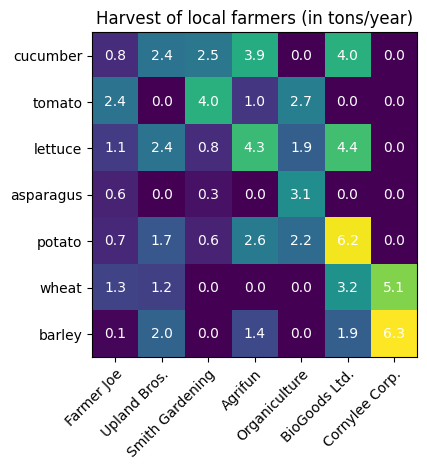

In [18]:
import matplotlib.pyplot as plt
import numpy as np

vegetables = ["cucumber", "tomato", "lettuce", "asparagus",
              "potato", "wheat", "barley"]
farmers = ["Farmer Joe", "Upland Bros.", "Smith Gardening",
           "Agrifun", "Organiculture", "BioGoods Ltd.", "Cornylee Corp."]

harvest = np.array([[0.8, 2.4, 2.5, 3.9, 0.0, 4.0, 0.0],
                    [2.4, 0.0, 4.0, 1.0, 2.7, 0.0, 0.0],
                    [1.1, 2.4, 0.8, 4.3, 1.9, 4.4, 0.0],
                    [0.6, 0.0, 0.3, 0.0, 3.1, 0.0, 0.0],
                    [0.7, 1.7, 0.6, 2.6, 2.2, 6.2, 0.0],
                    [1.3, 1.2, 0.0, 0.0, 0.0, 3.2, 5.1],
                    [0.1, 2.0, 0.0, 1.4, 0.0, 1.9, 6.3]])


fig, ax = plt.subplots()
im = ax.imshow(harvest)

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(farmers)), labels=farmers)
ax.set_yticks(np.arange(len(vegetables)), labels=vegetables)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(vegetables)):
    for j in range(len(farmers)):
        text = ax.text(j, i, harvest[i, j],
                       ha="center", va="center", color="w")

ax.set_title("Harvest of local farmers (in tons/year)")
fig.tight_layout()
plt.show()